# Lecture 12

notebook made with Google Colab.


We want to build a neural network for digit recognition.

In [0]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

## Exercise 12.1

We first try a DNN with two hidden layers, the first with 400 neurons and the second with 100. We try three different optimizers the standard SGD, RMSprop and Adam, all with their default parameters. The training will last for 10 epochs.

In [23]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


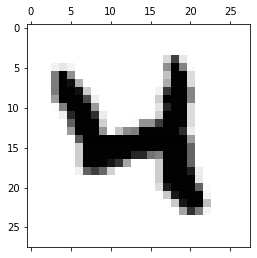

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [24]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [25]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_SGD():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

def compile_RMS():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    return model

def compile_Adam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

### SGD

In [27]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_SGD = compile_SGD()

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# train DNN and store training info in history
history = model_SGD.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.7563 - accuracy: 0.7780 - val_loss: 0.3097 - val_accuracy: 0.9184
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.3794 - accuracy: 0.8923 - val_loss: 0.2353 - val_accuracy: 0.9345
Epoch 3/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.3057 - accuracy: 0.9133 - val_loss: 0.1996 - val_accuracy: 0.9407
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2664 - accuracy: 0.9257 - val_loss: 0.1729 - val_accuracy: 0.9497
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2330 - accuracy: 0.9346 - val_loss: 0.1540 - val_accuracy: 0.9536
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2054 - accuracy: 0.9430 - val_loss: 0.1406 - val_accuracy: 0.9571
Epoch 7/10
60000/60000 [==============================] - 7s 1

10000/10000 [==============================] - 0s 41us/step

Test loss: 0.10695192309357227
Test accuracy: 0.9653000235557556


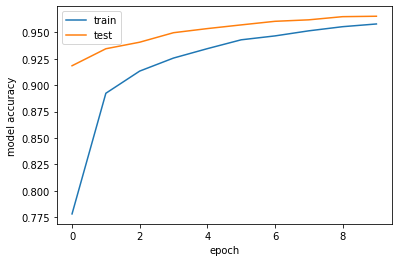

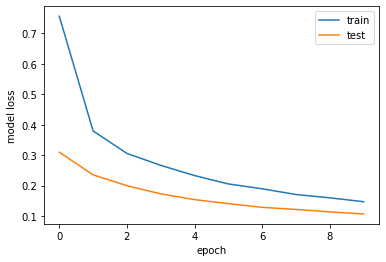

In [28]:
# evaluate model
score = model_SGD.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

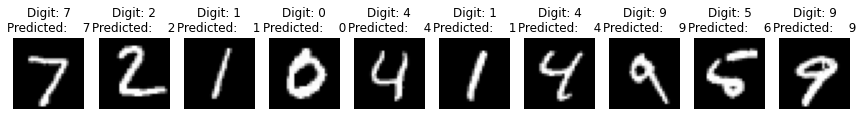

In [29]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_SGD.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### RMSprop

In [35]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_RMS = compile_RMS()

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# train DNN and store training info in history
history = model_RMS.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.2823 - accuracy: 0.9187 - val_loss: 0.1191 - val_accuracy: 0.9648
Epoch 2/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1475 - accuracy: 0.9631 - val_loss: 0.1212 - val_accuracy: 0.9718
Epoch 3/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1384 - accuracy: 0.9679 - val_loss: 0.1245 - val_accuracy: 0.9748
Epoch 4/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1428 - accuracy: 0.9708 - val_loss: 0.1447 - val_accuracy: 0.9732
Epoch 5/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1417 - accuracy: 0.9724 - val_loss: 0.1569 - val_accuracy: 0.9751
Epoch 6/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1464 - accuracy: 0.9734 - val_loss: 0.1621 - val_accuracy: 0.9748
Epoch 7/10
60000/60000 [==============================] - 9s 1

10000/10000 [==============================] - 0s 43us/step

Test loss: 0.21097289112744233
Test accuracy: 0.9760000109672546


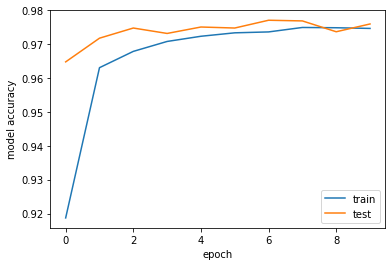

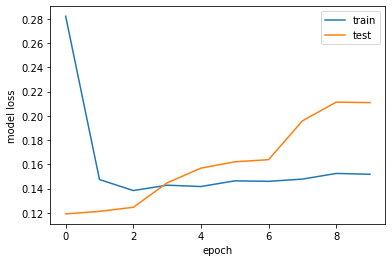

In [36]:
# evaluate model
score = model_RMS.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

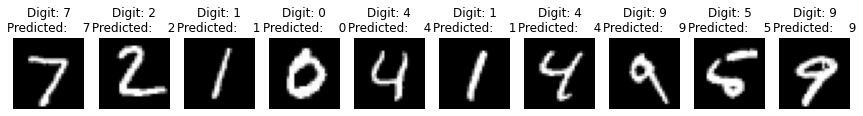

In [37]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_RMS.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Adam

In [38]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_Adam = compile_Adam()

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# train DNN and store training info in history
history = model_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.2792 - accuracy: 0.9181 - val_loss: 0.1177 - val_accuracy: 0.9646
Epoch 2/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.1225 - accuracy: 0.9649 - val_loss: 0.0812 - val_accuracy: 0.9756
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0892 - accuracy: 0.9741 - val_loss: 0.0795 - val_accuracy: 0.9772
Epoch 4/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0697 - accuracy: 0.9796 - val_loss: 0.0768 - val_accuracy: 0.9791
Epoch 5/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0566 - accuracy: 0.9832 - val_loss: 0.0748 - val_accuracy: 0.9789
Epoch 6/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0842 - val_accuracy: 0.9801
Epoch 7/10
60000/60000 [==============================] 

10000/10000 [==============================] - 0s 46us/step

Test loss: 0.08303270192407781
Test accuracy: 0.9811999797821045


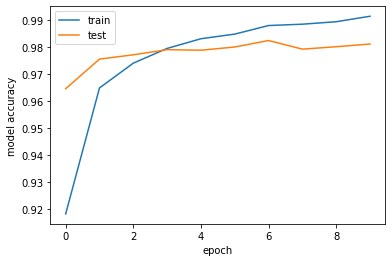

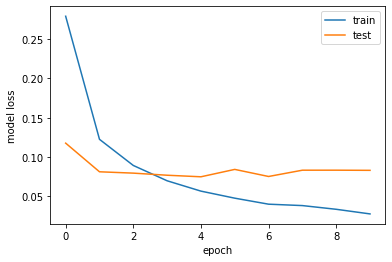

In [39]:
# evaluate model
score = model_Adam.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

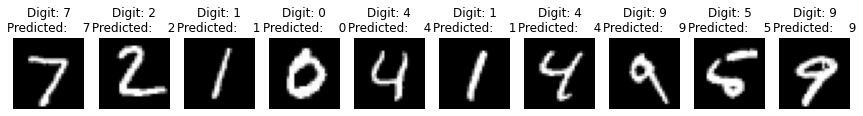

In [40]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_Adam.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

The basic SGD has an accuracy of 96.5%, but the loss is still decreasing, so the training could be prolonged. RMSprop has an accuracy of 97.5%, but seems overfitting after the 3$^{rd}$ epoch. Adam has an accuracy of 98%, but the test loss saturates at 0.1.

## Exercise 12.2

We now use a CNN with two conv2D layer, the first with 20 neurons and the second with 16, alternated with Maxpool2d. Then we insert a dropout with a probability of 15%, followed by 3 Dense, having the neurons from the first (400), to the last (100). After another dropout with a 25% probabiliy, we have the output layer. The training is again of 10 epochs with Adam as optimizer.

In [41]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [0]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(20, kernel_size=(5,5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(4,4), strides=None, padding='valid'))
    model.add(Conv2D(16, kernel_size=(4,4),activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=None, padding='valid'))
    model.add(Dropout(0.15))
    model.add(Flatten())
    model.add(Dense(400, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

In [43]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.6080 - accuracy: 0.7946 - val_loss: 0.1486 - val_accuracy: 0.9546
Epoch 2/10
60000/60000 [==============================] - 28s 462us/step - loss: 0.2768 - accuracy: 0.9137 - val_loss: 0.1136 - val_accuracy: 0.9669
Epoch 3/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.2063 - accuracy: 0.9373 - val_loss: 0.0889 - val_accuracy: 0.9722
Epoch 4/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.1607 - accuracy: 0.9509 - val_loss: 0.0840 - val_accuracy: 0.9745
Epoch 5/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.1348 - accuracy: 0.9596 - val_loss: 0.0730 - val_accuracy: 0.9778
Epoch 6/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.1254 - accuracy: 0.9625 - val_loss: 0.0819 - val_accuracy: 0.9756
Epoch 7/10
60000/60000 [==============================] 

10000/10000 [==============================] - 2s 153us/step

Test loss: 0.057905875044083226
Test accuracy: 0.982200026512146


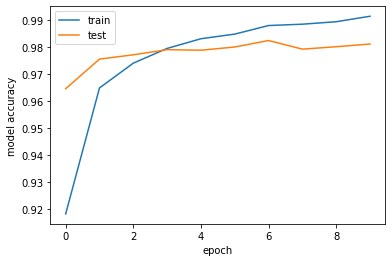

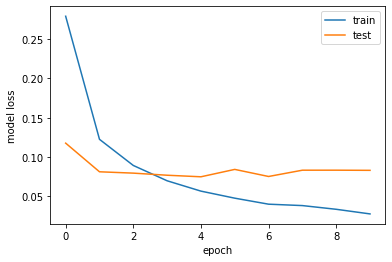

In [44]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

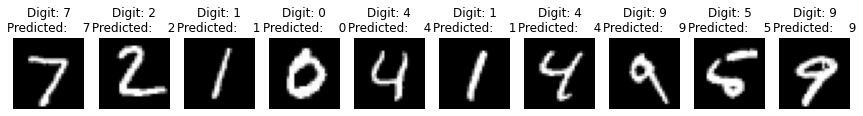

In [45]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

We can see the same behaviour of Adam-DNN: accuracy over 98% and loss that saturates.

## Exercise 12.3

We want to see if our networks recognize our handwritten digits.

In [22]:
from PIL import Image
import os

#REMOVE THE FOLLOWING LINES, ONLY FOR COLAB
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Lez12/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


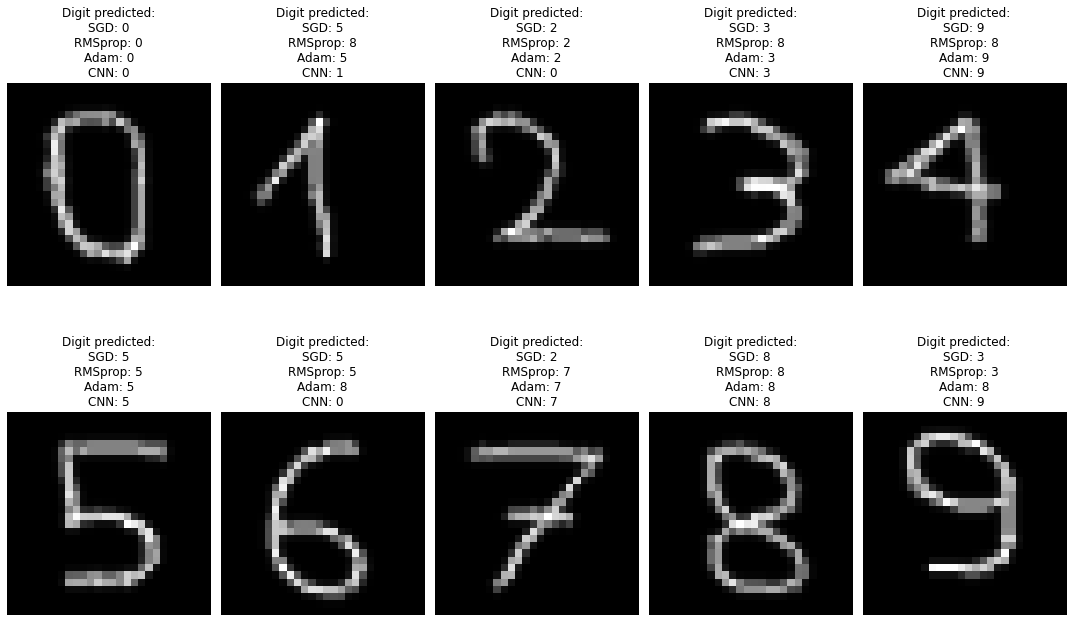

In [58]:
img_width = 28
img_height = 28

fig, axes = plt.subplots(2, 5,figsize = (15,10))
axes = axes.flatten()

for digit in range(10):
    filename = base_dir+str(digit)+".png" #remove base_dir
    digit_image = Image.open(filename).convert('L')

    ydim, xdim = digit_image.size
    pix = digit_image.load()
    data = np.zeros((xdim, ydim))
    
    for j in range(ydim):
        for i in range(xdim):
            data[i,j] = pix[j,i]

    data /= 255
    axes[digit].imshow(data, cmap = "gray")
    """
    if keras.backend.image_data_format() == "channels_first":
        data = data.reshape(1, 1, img_width, img_height)
    else:
        data = data.reshape(1, img_width, img_height, 1)
    """
    axes[digit].axis("off")
    data = data.reshape(1,img_width*img_height)
    title= "Digit predicted:\n"
    title=title+"SGD: "+str(np.argmax(model_SGD.predict(data)))+"\n"
    title=title+"RMSprop: "+str(np.argmax(model_RMS.predict(data)))+"\n"
    title=title+"Adam: "+str(np.argmax(model_Adam.predict(data)))+"\n"
    data = data.reshape(1, img_width, img_height, 1)
    title=title+"CNN: "+str(np.argmax(model_CNN.predict(data)))
    axes[digit].set_title(title)

fig.tight_layout()
plt.show()

All the four networks are able to recognize 0, 5 and 8, while none recognizes 4 or 6. 2, 3 and 7 are identified by three nets, 1 and 9 only by one.

SGD DNN and RMSprop are able to recognize only 5 digits, Adam DNN 6 and Adam CNN 7. 